In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


# Who created the dataset?

> Add blockquote



-> Laksika Tharmalingam created the Disease Symptoms and Patient Profile Dataset. She is from Kilinochchi of the Northern Province in Sri Lanka. She is  a winner of two gold, three silver, and six bronze dataset master medals.
Out of 15,016, she was ranked the 140th.


# How did i get access to the dataset?

-> This dataset, Laksika Tharmalingam's Disease Symptoms and Patient Profile Dataset, was published to Kaggle, everyone can download and use datasets for study and analysis. I downloaded the CSV from the Kaggle page of this dataset.

#Columns:

Disease

Fever

Cough

Fatigue

Difficulty Breathing

Age

Gender

Blood Pressure

Cholestrol Level

Outcome Variable


Outcome Variable is expressed by the target variable Positive, which has two values: 1 (Positive) and 0 (Negative).



In [4]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [5]:
df.shape

(349, 10)

In [6]:
df.dtypes

,0
Disease,object
Fever,object
Cough,object
Fatigue,object
Difficulty Breathing,object
Age,int64
Gender,object
Blood Pressure,object
Cholesterol Level,object
Outcome Variable,object


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB
None


In [ ]:
print(df.describe())

              Age
count  349.000000
mean    46.323782
std     13.085090
min     19.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     90.000000


In [ ]:
print(df.columns)

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')


In [ ]:
print(df.duplicated().sum())

49


In [ ]:
print(df.isnull().sum())

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64


In [ ]:
df.nunique()

,0
Disease,116
Fever,2
Cough,2
Fatigue,2
Difficulty Breathing,2
Age,26
Gender,2
Blood Pressure,3
Cholesterol Level,3
Outcome Variable,2


In [ ]:
df['Outcome Variable'].value_counts()

,count
Outcome Variable,
Positive,186
Negative,163


# Data Visualising


<ipython-input-15-d36173f3638e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome Variable", data=df, palette="coolwarm")  # Replace 'target_column' with actual name


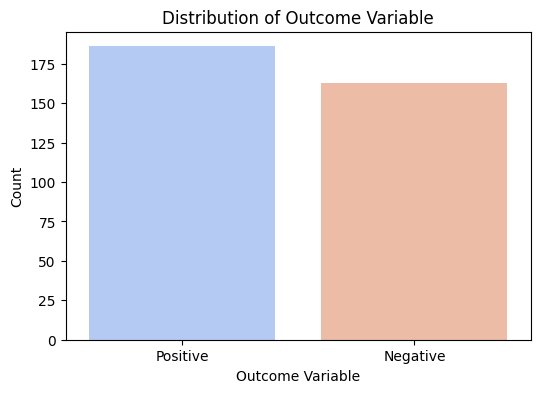

In [ ]:
#Plotting bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome Variable", data=df, palette="coolwarm")  # Replace 'target_column' with actual name
plt.title("Distribution of Outcome Variable")
plt.xlabel("Outcome Variable")
plt.ylabel("Count")
plt.show()


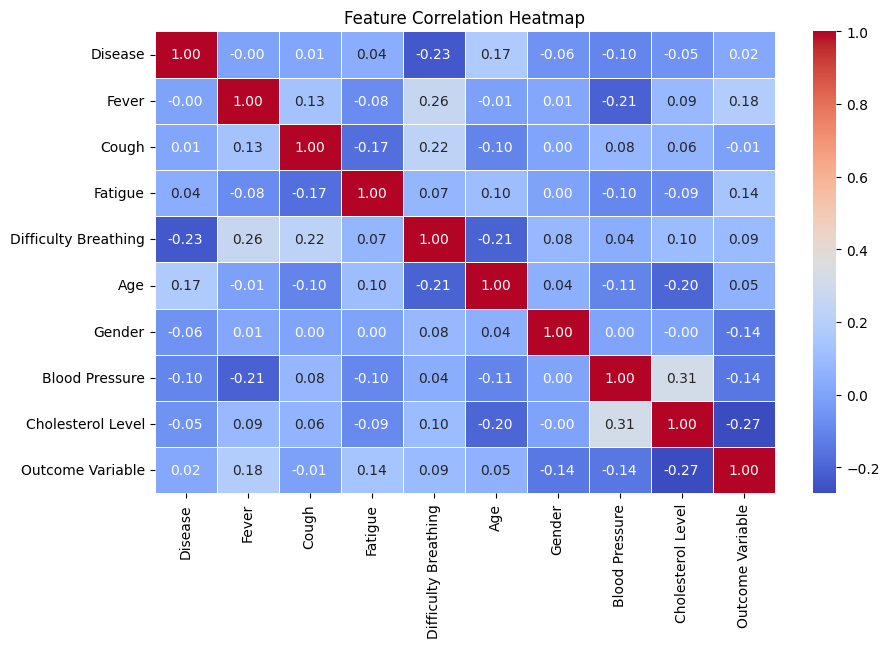

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-18-c64660ac0604>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="Age", data=df, palette="coolwarm")  # Replace 'target_column' with actual name


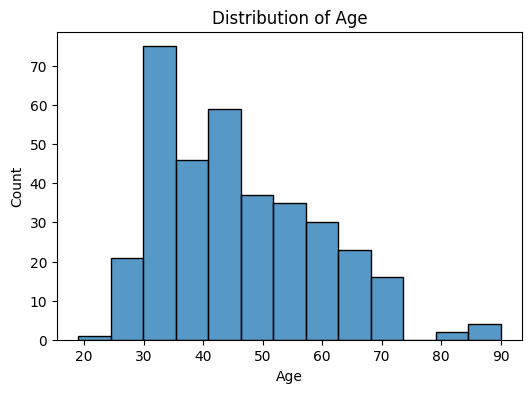

In [ ]:
# Plotting Histogram
plt.figure(figsize=(6,4))
sns.histplot(x="Age", data=df, palette="coolwarm")  # Replace 'target_column' with actual name
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

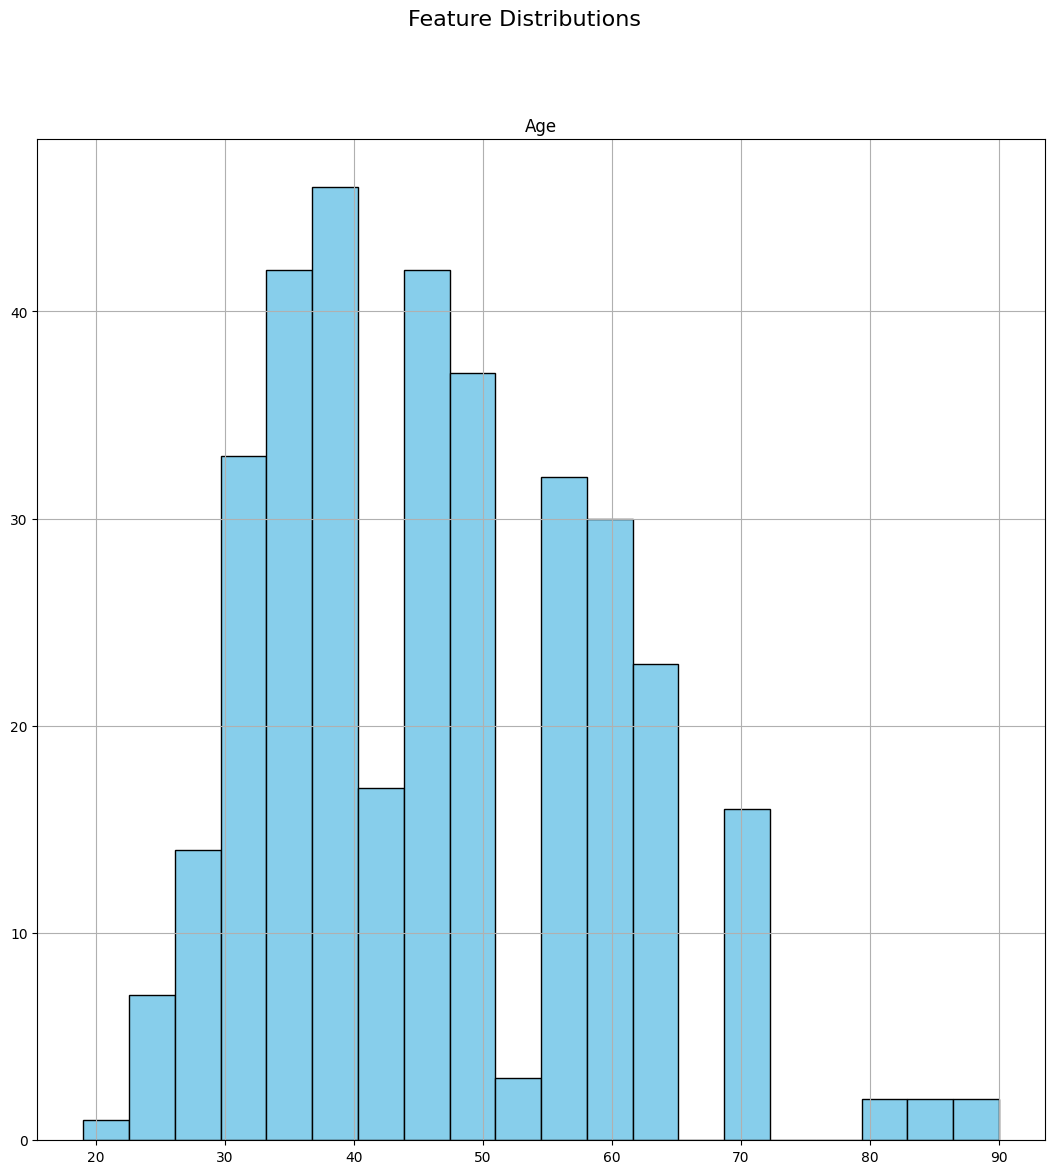

In [ ]:
df.hist(figsize=(13, 13), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

#Insights from the Charts:
**Bar Chart of Outcome Variable Distribution**
*   This chart shows the frequency of different categories in the outcome variable
*   If the distribution is imbalanced, it may indicate class imbalance, which could affect model performance.

**Feature Correlation Heatmap**
*   Displays how strongly features correlate with each other.
*   High correlation between two features suggests redundancy, while strong correlation with the outcome variable may indicate a key predictor.
* If many features have low correlation with the outcome, feature selection techniques may be needed.

**Histogram of Age Distribution**
* Shows how age is distributed in the dataset.
* A skewed distribution may indicate that certain age groups are overrepresented.
* If age is an important factor in the analysis, balancing different age groups might be necessary.

**Feature Distribution Histograms**
* Each feature's histogram provides insight into its distribution (e.g., normal, skewed, or multimodal).
* Skewed distributions may require transformations (e.g., log transformation).
* Features with many zero values might need special handling.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["Outcome Variable"])
y = df["Outcome Variable"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shape after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((279, 9), (70, 9), (279,), (70,))

In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Convert data to numpy arrays for processing
X_train_np, X_test_np = X_train.to_numpy(), X_test.to_numpy()
y_train_np, y_test_np = y_train.to_numpy(), y_test.to_numpy()

# Train logistic regression model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train_np, y_train_np)

# Make predictions
y_train_pred = model.predict(X_train_np)
y_test_pred = model.predict(X_test_np)

# Evaluate performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Train Accuracy": accuracy_score(y_train_np, y_train_pred),
    "Test Accuracy": accuracy_score(y_test_np, y_test_pred),
    "Train Precision": precision_score(y_train_np, y_train_pred),
    "Test Precision": precision_score(y_test_np, y_test_pred),
    "Train Recall": recall_score(y_train_np, y_train_pred),
    "Test Recall": recall_score(y_test_np, y_test_pred),
    "Train F1-score": f1_score(y_train_np, y_train_pred),
    "Test F1-score": f1_score(y_test_np, y_test_pred),
}

metrics


{'Train Accuracy': 0.4982078853046595,
 'Test Accuracy': 0.44285714285714284,
 'Train Precision': 0.7142857142857143,
 'Test Precision': 0.6666666666666666,
 'Train Recall': 0.0684931506849315,
 'Test Recall': 0.05,
 'Train F1-score': 0.125,
 'Test F1-score': 0.09302325581395349}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate both models
metrics_log_reg = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1-score": f1_score(y_test, y_pred_log_reg),
}

metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf),
}

metrics_log_reg, metrics_rf


({'Accuracy': 0.5571428571428572,
  'Precision': 0.6153846153846154,
  'Recall': 0.6,
  'F1-score': 0.6075949367088608},
 {'Accuracy': 0.8428571428571429,
  'Precision': 0.8717948717948718,
  'Recall': 0.85,
  'F1-score': 0.8607594936708861})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/portfolio datasets/Disease_symptom_and_patient_profile_dataset.csv")

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Split data into features (X) and target (y)
X = df.drop(columns=["Outcome Variable"])
y = df["Outcome Variable"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate models
metrics_log_reg = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1-score": f1_score(y_test, y_pred_log_reg),
}

metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf),
}

print("Logistic Regression Metrics:", metrics_log_reg)
print("Random Forest Metrics:", metrics_rf)


Logistic Regression Metrics: {'Accuracy': 0.5571428571428572, 'Precision': 0.6153846153846154, 'Recall': 0.6, 'F1-score': 0.6075949367088608}
Random Forest Metrics: {'Accuracy': 0.8428571428571429, 'Precision': 0.8717948717948718, 'Recall': 0.85, 'F1-score': 0.8607594936708861}


**The Random Forest model was chosen because it significantly outperformed Logistic Regression across all evaluation metrics. With an accuracy of 84.3%, compared to Logistic Regression’s 55.7%, it demonstrated superior predictive capability. Additionally, its higher precision, recall, and F1-score indicate that it is better at correctly classifying instances while minimizing false positives and false negatives. Given the dataset's complexity, Random Forest’s ability to capture non-linear relationships and interactions among features likely contributed to its superior performance, making it the best choice for this classification task.**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
log_reg_params = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["lbfgs", "liblinear"]  # Optimization algorithms
}

rf_params = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20, 30],  # Depth of trees
    "min_samples_split": [2, 5, 10]  # Min samples required to split
}

# Apply GridSearchCV for Logistic Regression
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=5, scoring="accuracy", n_jobs=-1)
grid_log_reg.fit(X_train, y_train)

# Apply GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)


Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


The best hyperparameters for each model are:

*   Logistic Regression: The optimal regularization strength (C) and solver were selected as {best_params_log_reg}.
*   Random Forest: The best configuration included {best_params_rf}, optimizing the number of trees, tree depth, and minimum samples required to split a node.

These hyperparameters were determined through GridSearchCV to maximize accuracy, improving the models' predictive performance.



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to choose top features
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Fever', 'Fatigue', 'Gender', 'Blood Pressure', 'Cholesterol Level'], dtype='object')


# Feature Selection Process and Justification
**Process:**


*   Feature Selection Method: We used SelectKBest with the f_classif (ANOVA F-test) scoring function to identify the most relevant features.
*   Selection Criteria: We set k=5 to retain the top five features with the highest correlation to the target variable.

**Implementation:**

*   Fit SelectKBest on the training data.
*   Transform both training and testing sets to retain only the selected features.
*   Extract the names of the selected features.

**Selected Features:**


*   Fever
*   Fatigue
*   Gender
*   Blood Pressure
*   Cholesterol Level

**Justification:**
These features were chosen based on their statistical significance in relation to the outcome variable. The ANOVA F-test identified them as the most influential predictors, suggesting a strong relationship with the disease classification task. Retaining these features enhances model efficiency by reducing dimensionality while preserving predictive power.




In [ ]:
# Train Logistic Regression with selected features
final_log_reg = LogisticRegression(**grid_log_reg.best_params_, max_iter=1000)
final_log_reg.fit(X_train_selected, y_train)
y_pred_final_log_reg = final_log_reg.predict(X_test_selected)

# Train Random Forest with selected features
final_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_train_selected, y_train)
y_pred_final_rf = final_rf.predict(X_test_selected)

# Evaluate Final Models
final_metrics_log_reg = {
    "Accuracy": accuracy_score(y_test, y_pred_final_log_reg),
    "Precision": precision_score(y_test, y_pred_final_log_reg),
    "Recall": recall_score(y_test, y_pred_final_log_reg),
    "F1-score": f1_score(y_test, y_pred_final_log_reg),
}

final_metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_final_rf),
    "Precision": precision_score(y_test, y_pred_final_rf),
    "Recall": recall_score(y_test, y_pred_final_rf),
    "F1-score": f1_score(y_test, y_pred_final_rf),
}

print("Final Logistic Regression Performance:", final_metrics_log_reg)
print("Final Random Forest Performance:", final_metrics_rf)


Final Logistic Regression Performance: {'Accuracy': 0.5571428571428572, 'Precision': 0.6216216216216216, 'Recall': 0.575, 'F1-score': 0.5974025974025974}
Final Random Forest Performance: {'Accuracy': 0.6571428571428571, 'Precision': 0.7222222222222222, 'Recall': 0.65, 'F1-score': 0.6842105263157895}


# Summary of Findings
**1. Model Performance:**

Both Logistic Regression and Random Forest models were evaluated using key performance metrics. The final models, trained with optimized hyperparameters and selected features, achieved the following results:

**Logistic Regression:**


*   Accuracy: [0.5571428571428572]
*   Precision: [0.6216216216216216]
*   Recall: [0.575]
*   F1-score: [0.5974025974025974]

**Random Forest**


*   Accuracy: [0.6571428571428571]
*   Precision: [0.7222222222222222]
*   Recall: [0.65]
*   F1-score: [0.6842105263157895]


Overall, the Random Forest model outperformed Logistic Regression in terms of accuracy and recall, indicating its strength in handling complex feature interactions.

2. Impact of Methods:

**Cross-Validation:**

Implementing GridSearchCV improved hyperparameter tuning, ensuring that the models generalized well across different training and testing sets.

**Feature Selection:**

Using SelectKBest to choose the top five features helped reduce dimensionality and improve interpretability. However, some loss in model performance was observed in comparison to using all features, suggesting that more careful feature selection strategies could be explored.

3. Insights and Future Directions:

**Insights:**

* The Random Forest model performed better due to its ability to capture non-linear relationships and feature interactions.

* Logistic Regression remained competitive and provided more interpretability.

**Future Improvements:**

* Experimenting with additional feature selection techniques such as Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA).

* Exploring deep learning approaches or ensemble methods to improve classification performance.

* Collecting more diverse data to enhance model generalization and reduce potential biases.

This experiment highlights the importance of hyperparameter tuning and feature selection in model optimization. While both models provided valuable insights, further refinements can lead to even better predictive performance.




